In [2]:
import numpy as np
from matplotlib import pyplot as plt, cm
from scipy import stats
%matplotlib inline

<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
***ایجاد پایگاه داده***  
    در اولین قدم، ما تعدادی داده که می‌خواهیم مدلمان را بر روی آن‌ها برازش کنیم، را ایجاد می‌نماییم. بیایید فرض کنیدم که یک رابطه خطی بین تخمین‌گر و متغیرهای پاسخ است، بنابراین ما یک مدل خطی به همراه نویز جمع شونده در نظر می‌گیریم.
</p>

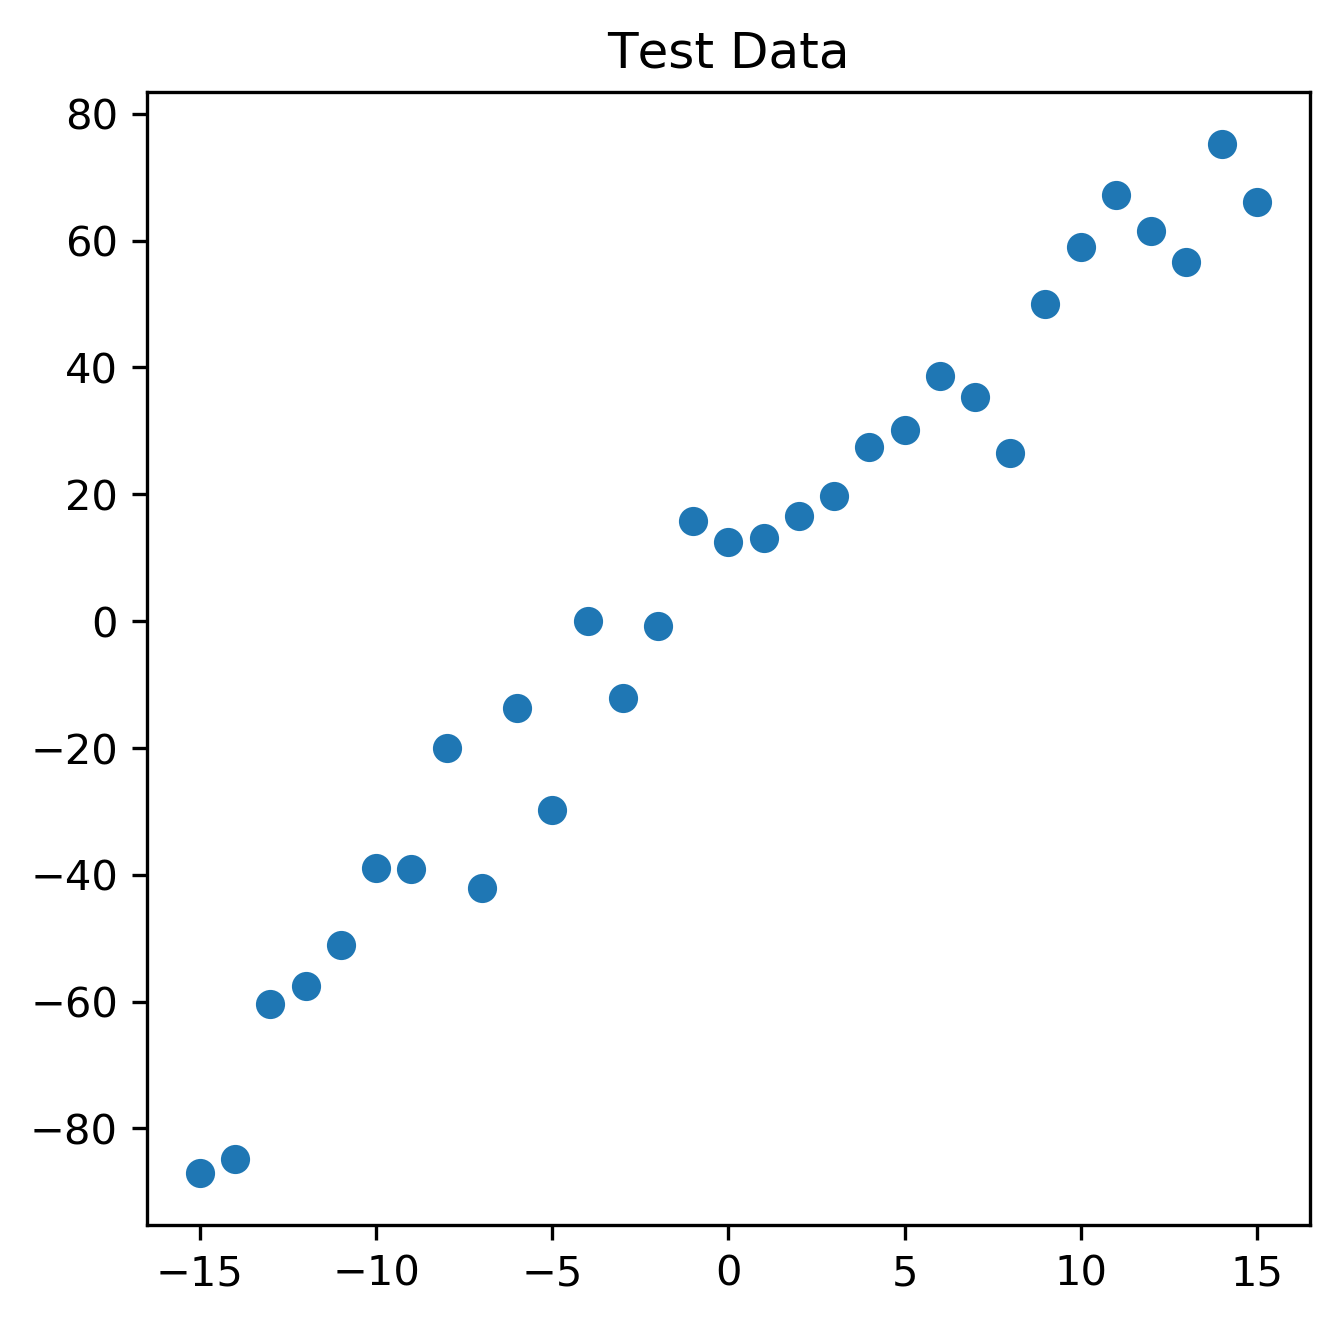

In [3]:
trueA = 5
trueB = 3
trueSd = 10
sampleSize = 31

# create independent x-values 
x = np.arange(-(sampleSize-1)/2, (sampleSize-1)/2+1)
# create dependent values according to ax + b + N(0,sd)
y = trueA * x + trueB + np.random.randn(sampleSize)*trueSd + 0

plt.figure(figsize=(5,5), dpi=300)
plt.plot(x,y,'o')
plt.title("Test Data");

<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
مقدار 
    x
   را حول صفر متعادل در نظر گرفتیم برای این که شیب و عرض از مبداء نا همبسته باشند. نتایج تصویری شبیه تصویر بالا خواهد شد.

</p>

<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
***تعریف مدل آماری***  
    بخش بعد مربوط به تعیین مدل آماری است. ما می‌دانیم که داده‌ها با یک رابطه خطی ایجاد شده‌اند، و بین y و x یک خطای نرمال با میانگین صفر و انحراف معیار sd است، حالا از یک مدل مشابه برای برازش استفاده می‌کنیم و خواهیم دید که می‌توانیم پارامترهای اصلی مسأله را ببینیم.
</p>
<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
***بدست آوردن تابع شباهت برای مدل***  
برای تخمین پارامترها در تحلیل بیز، ما نیاز داریم که تابع معیار شباهت را برای مدلی که می‌خواهیم برازش کنیم را بدست آوریم.  
    تابع معیار شباهت احتمالی (چگالی) است که انتظار داریم داده‌های مشاهده شده، با شرط پارامترهایی که مدل با آن‌ها نگاه می‌کند اتفاق بیفتند.  
    بنابراین با داشتن مدل خطی خود به صورت y = ax+b + N و داشتن پارامترهای a,b,sd به عنوان ورودی می‌توانیم احتمال بدست آمدن داده‌ها را با شرط این مدل بدست آوریم.  
    
</p>

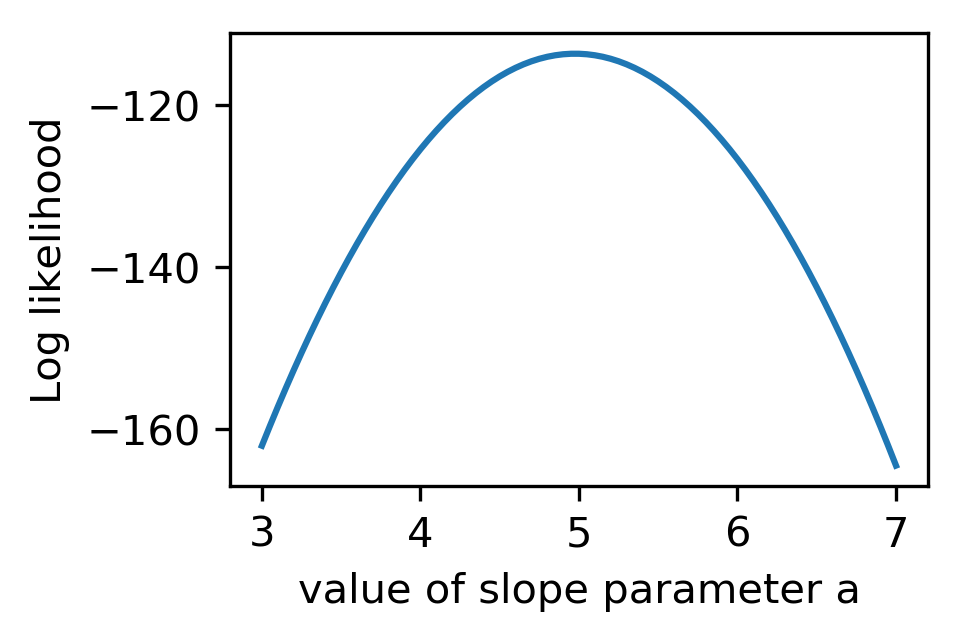

In [11]:
def likelihood (x, y, param, log=False):
    a = param[0]
    b = param[1]
    sd = param[2]
    sumll = []
    if type(a) is type(x):
        for i in a:
            pred = i*x + b
            if log:
                singlelikelihoods = stats.norm.logpdf(y, loc=pred, scale=sd)
                sumll.append(np.sum(singlelikelihoods))
            else:
                singlelikelihoods = stats.norm.pdf(y, loc=pred, scale=sd)
                sumll.append(np.prod(singlelikelihoods))
        return np.array(sumll)
    else :
        pred = a * x + b
        if log:
            return np.sum(stats.norm.logpdf(y, loc=pred, scale=sd))
        else:
            return np.prod(stats.norm.pdf(y, loc=pred, scale=sd))




a = np.arange(3, 7, 0.05)
a = np.hstack((a, 7))
slopelikelihoods = likelihood(x, y, (a,trueB, trueSd), log=True)
plt.figure(figsize=(3,2), dpi=300)
plt.plot(a, slopelikelihoods)
plt.xlabel('value of slope parameter a')
plt.ylabel('Log likelihood');

<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
به عنوان یک نمایش، آخرین خط کد بالا معیار شباهت برای بازه‌ای از مقدار پارامتر شیب a نشان داده شده است. 
</p>

<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
***چرا ما با لگاریتم کار می‌کنیم***  
احتمالا متوجه شدید که در تابع معیار شباهت، لگاریتم احتمال را برگرداندیم، و این که چرا احتمال بر روی همه نقاط با هم جمع شده است. حالا چرا همچنین کاری انجام داده‌ایم؟  
شما مجبور به این کار نیستید، اما به طور خاص پیشنهاد می‌شود که از لگاریتم استفاده کنید، دلیل آن هم خود تابع معیار شباهت است. جایی که شما احتمالات بسیار کوچک را در هم ضرب می‌کنید، خیلی سریع مقدار نهایی کوچک می‌شود. در برخی حالت‌ها برنامه‌های کامپیوتری آن‌ها را به مقدار کوچکتر یعنی صفر گرد می‌کند و این باعث مشکل می‌شود. بنابراین بهتر است که وقتی با معیار شباهت کار می‌کنید، از لگاریتم آن استفاده نمایید.
</p>

<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
***تعریف احتمال پیشین***   
به عنوان یک گام دوم، همیشه در آمار بیزین، ما می‌خواهیم برای هر پارامتر یک توزیع پیشین تعیین کنیم. برای این که کار را راحت نماییم، از توزیع‌های یکنواخت و نرمال برای همه پارامترها استفاده شده است.
</p>

In [12]:
# Prior distribution
def prior(param, log=False):
    a = param[0]
    b = param[1]
    sd = param[2]
    if log:
        aprior = stats.uniform.logpdf(a, loc=0, scale=10)
        bprior = stats.uniform.logpdf(b, loc=0, scale=5)
        sdprior = stats.uniform.logpdf(sd, loc=0, scale=30)
        return aprior + bprior + sdprior
    else:
        aprior = stats.uniform.pdf(a, loc=0, scale=10)
        bprior = stats.uniform.pdf(b, loc=0, scale=5)
        sdprior = stats.uniform.pdf(sd, loc=0, scale=30)
        return aprior * bprior * sdprior

<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
***احتمال پسین***  
حاصل ضرب معیار شباهت و احتمال پیشین یک کمیتی است که MCMC روی آن کار خواهد کرد. به این تابع احتمال پسین می‌گوییم. 
<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">

In [13]:
def posterior(x, y, param, log=False):
    if log:
        return likelihood(x, y, param, log) + prior(param, log)
    else:
        return likelihood(x, y, param, log) * prior(param, log)

<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
***روش MCMC***  
در اینجا روش متروپولیس-هستینگز ارایه می‌شود. یکی از کابردهای مهم این الگوریتم مانند این مثال،  نمونه برداری از چگالی احتمال پسین در احتمالات بیزین است. در حالت خاص، هر چند که الگوریتم ممکن است برای نمونه برداری از هر تابع انتگرال پذیری بکار می‌رود. بنابراین هدف ایین الگوریتم پرش حول مقادیر فضای پارامتر است. اما این کار در مسیری است که احتمال بودن در یک نقطه با تابعی که از آن نمونه برداری می‌شود (یعنی تابع هدف) متناسب باشد. در اینجا تابع هدف همان احتمال پسینی است که تعریف کرده‌ایم.  
الگوریتم به این صورت بدست می‌آید:  
 ۱- از مقدار تصادفی برای پارامترها آغاز می‌کنیم.  
 ۲- مقدار جدید را برای  یک پارامتر نزدیک به مقدار قبلی آن بر اساس یک چگالی احتمال که به آن تابع پیشنهادی می‌گوییم انتخاب می‌کنیم.  
 ۳- پرش زنجیره بر اساس نسبت احتمال جدید به احتمال قبلی انجام می‌شود. این احتمال با استفاده از تابع هدف تعیین می‌شود و هر گاه مقدار آن از یک بزرگ‌تر بود یعنی پرش انجام می‌شود.  
فکر کردن به این که الگوریتم کار می‌کند بامزه است! اما برای یک لحظه می‌توان به شما این اطمینان را داد که کار می‌کند. وقتی که ما این الگوریتم را اجرا می‌کنیم، توزیع پارامترها به توزیع هدف همگرا می‌شود.
</p>

In [23]:

######## Metropolis algorithm ################

def proposalfunction(param):
    return np.array([np.random.randn()*10 + param[0] , np.random.randn()*4 + param[1],
                      np.random.randn()*5 + param[2]])



def run_metropolis_MCMC(startvalue, iterations, log=False):
    chain = np.zeros((iterations,3))
    chain[0] = startvalue
    
    for i in range(0, iterations-1):
        proposal = proposalfunction(chain[i])
        if log:
            probab = np.exp(posterior(x, y, proposal, log) - posterior(x, y, chain[i], log))
        else:
            probab = posterior(x, y, proposal, log) / posterior(x, y, chain[i], log)
        if (np.random.rand() < probab):
            chain[i+1] = proposal
        else:
            chain[i+1] = chain[i]


    return(chain)


startvalue = np.array([1,2,5])
chain = run_metropolis_MCMC(startvalue, 20000, log=True)

#plt.plot(chain)

burnIn = 5000
acceptance = 1-(np.unique(chain[5000::]).shape[0]/chain[5000::].shape[0])



/usr/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


<p style="direction:rtl;text-align:justify;font-family:Vazir;font-size:12pt;line-height:1.5">
دوباره، کار کردن با لگاریتم احتمال پسین ممکن است مقداری گیچ کننده باشد، اما وقتی به برنامه جایی که احتمال پذیرش محاسبه می‌شود،‌از تفاضل نمایی به دلیل استفاده از لگاریتم معیار شباهت استفاده شده است.  
قدم‌های اول الگورتم ممکن است توسط مقدار اولیه بایاس شده باشد، و بنابراین معمول است که تا زمان معینی از تغییرات زنجیره را نادیده گرفت، این زمان را burn-in time می‌گویند. در حقیقت زمانی است که زنجیره به مقدار ایستان خود همگرا می‌شود.
یکی از خروجی‌هایی که دیدنش جذاب است، نرخ پذیرش می‌باشد: یعنی اغلب چه تعداد از پیشنهادها توسط روش متروپولیس-هستینگز پذیرفته می‌شود. نرخ پذیرش می‌تواند توسط تابع پیشنهادی تعیین شود، معمولا پیشنهادهای نزدیک‌نرخ پذیرش بیشتری دارند. یک نرخ پذیرش خیلی بزرگ،همیشه سودمند نیست. به این معنی که در نقطه‌ای جواب شبه بهینه دارد بماند.  
  
------------------------------------------------------------------------------------------------------------  

در نهایت می‌توانیم نتایج را رسم نماییم.
</p>

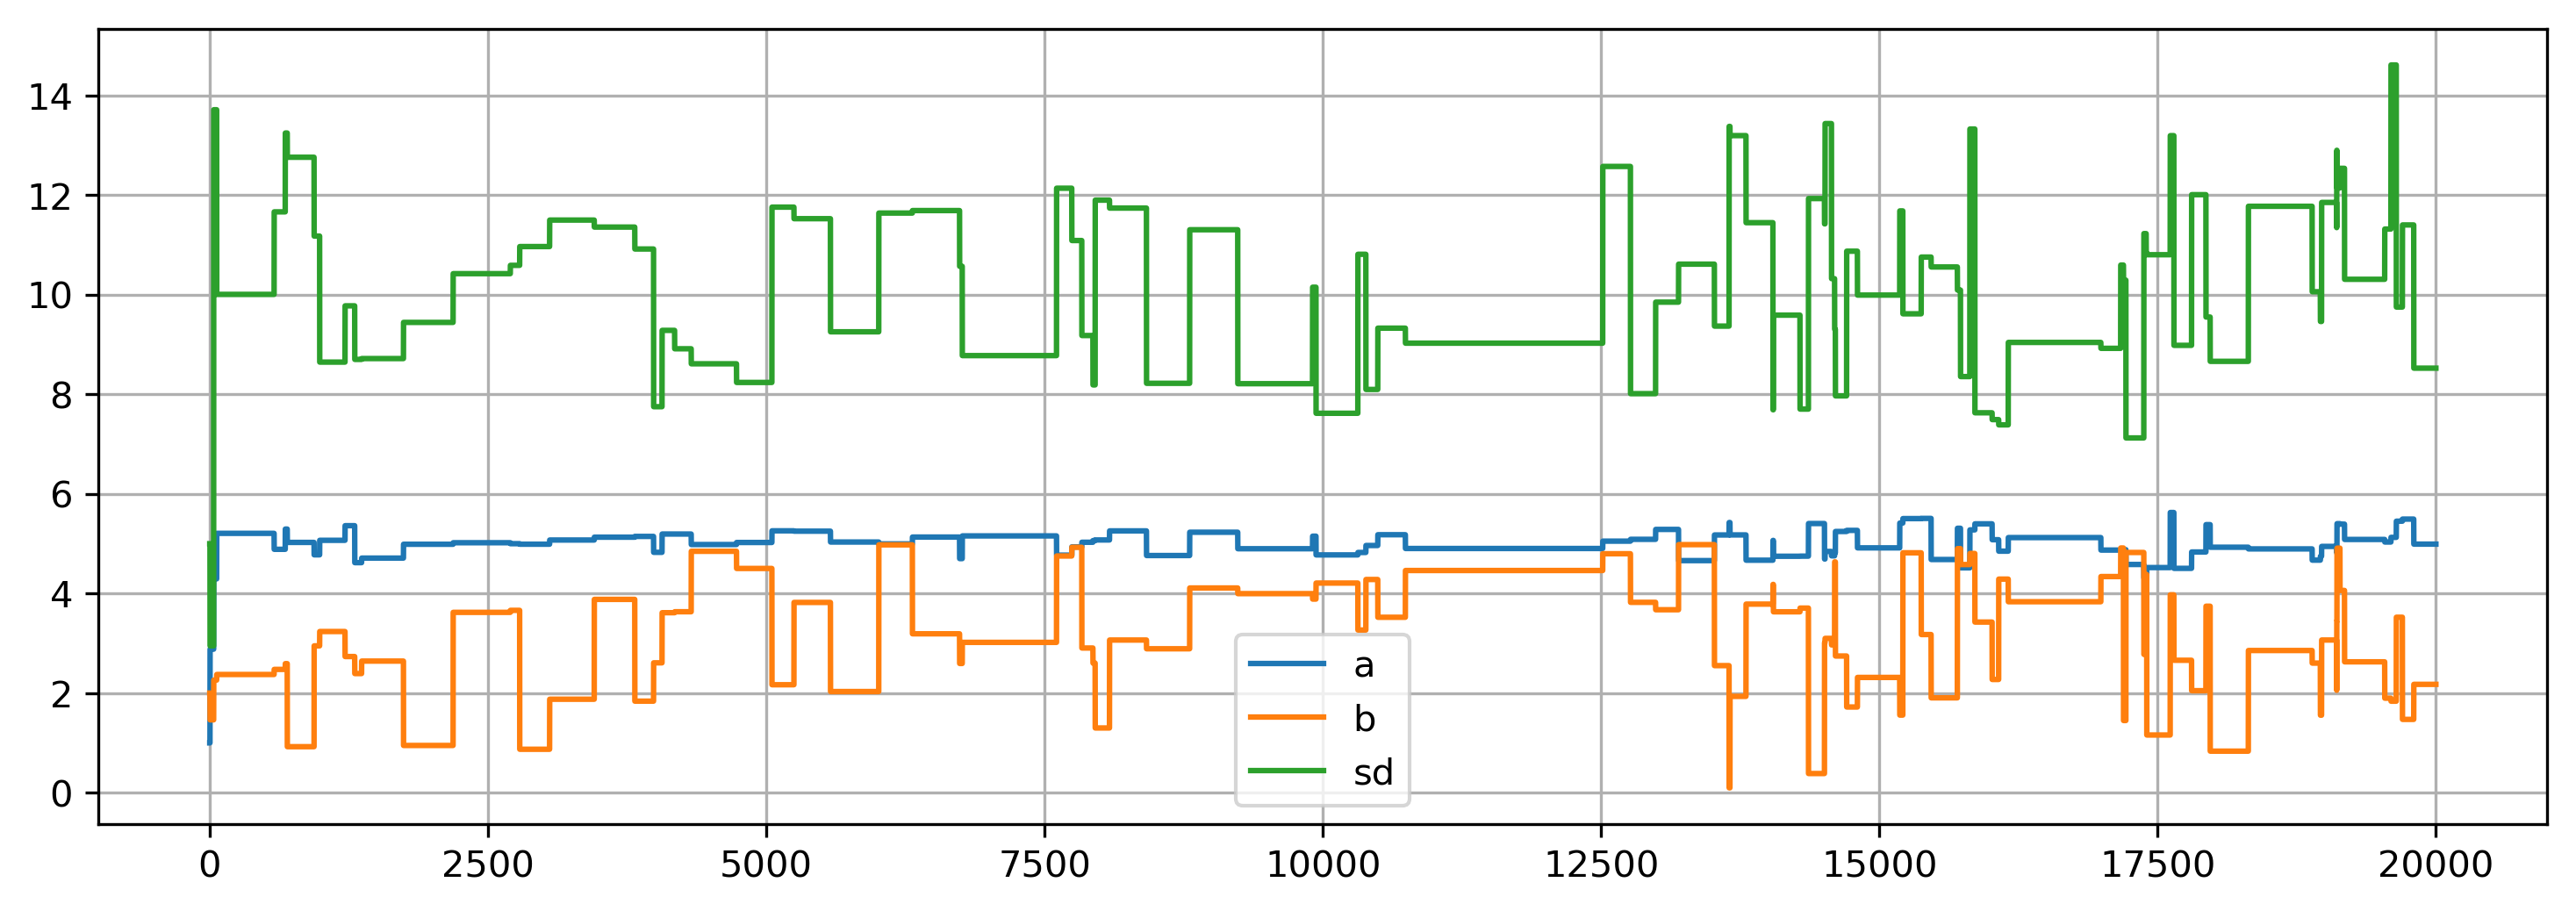

In [24]:
plt.figure(figsize=(12,4), dpi=300)
plt.plot(chain)
plt.legend(['a', 'b', 'sd']);
plt.grid(1)

a =  4.999140329315911  | b =  3.383978241261433  | sd =  9.886730512218318
a =  5  | b =  3  | sd =  10


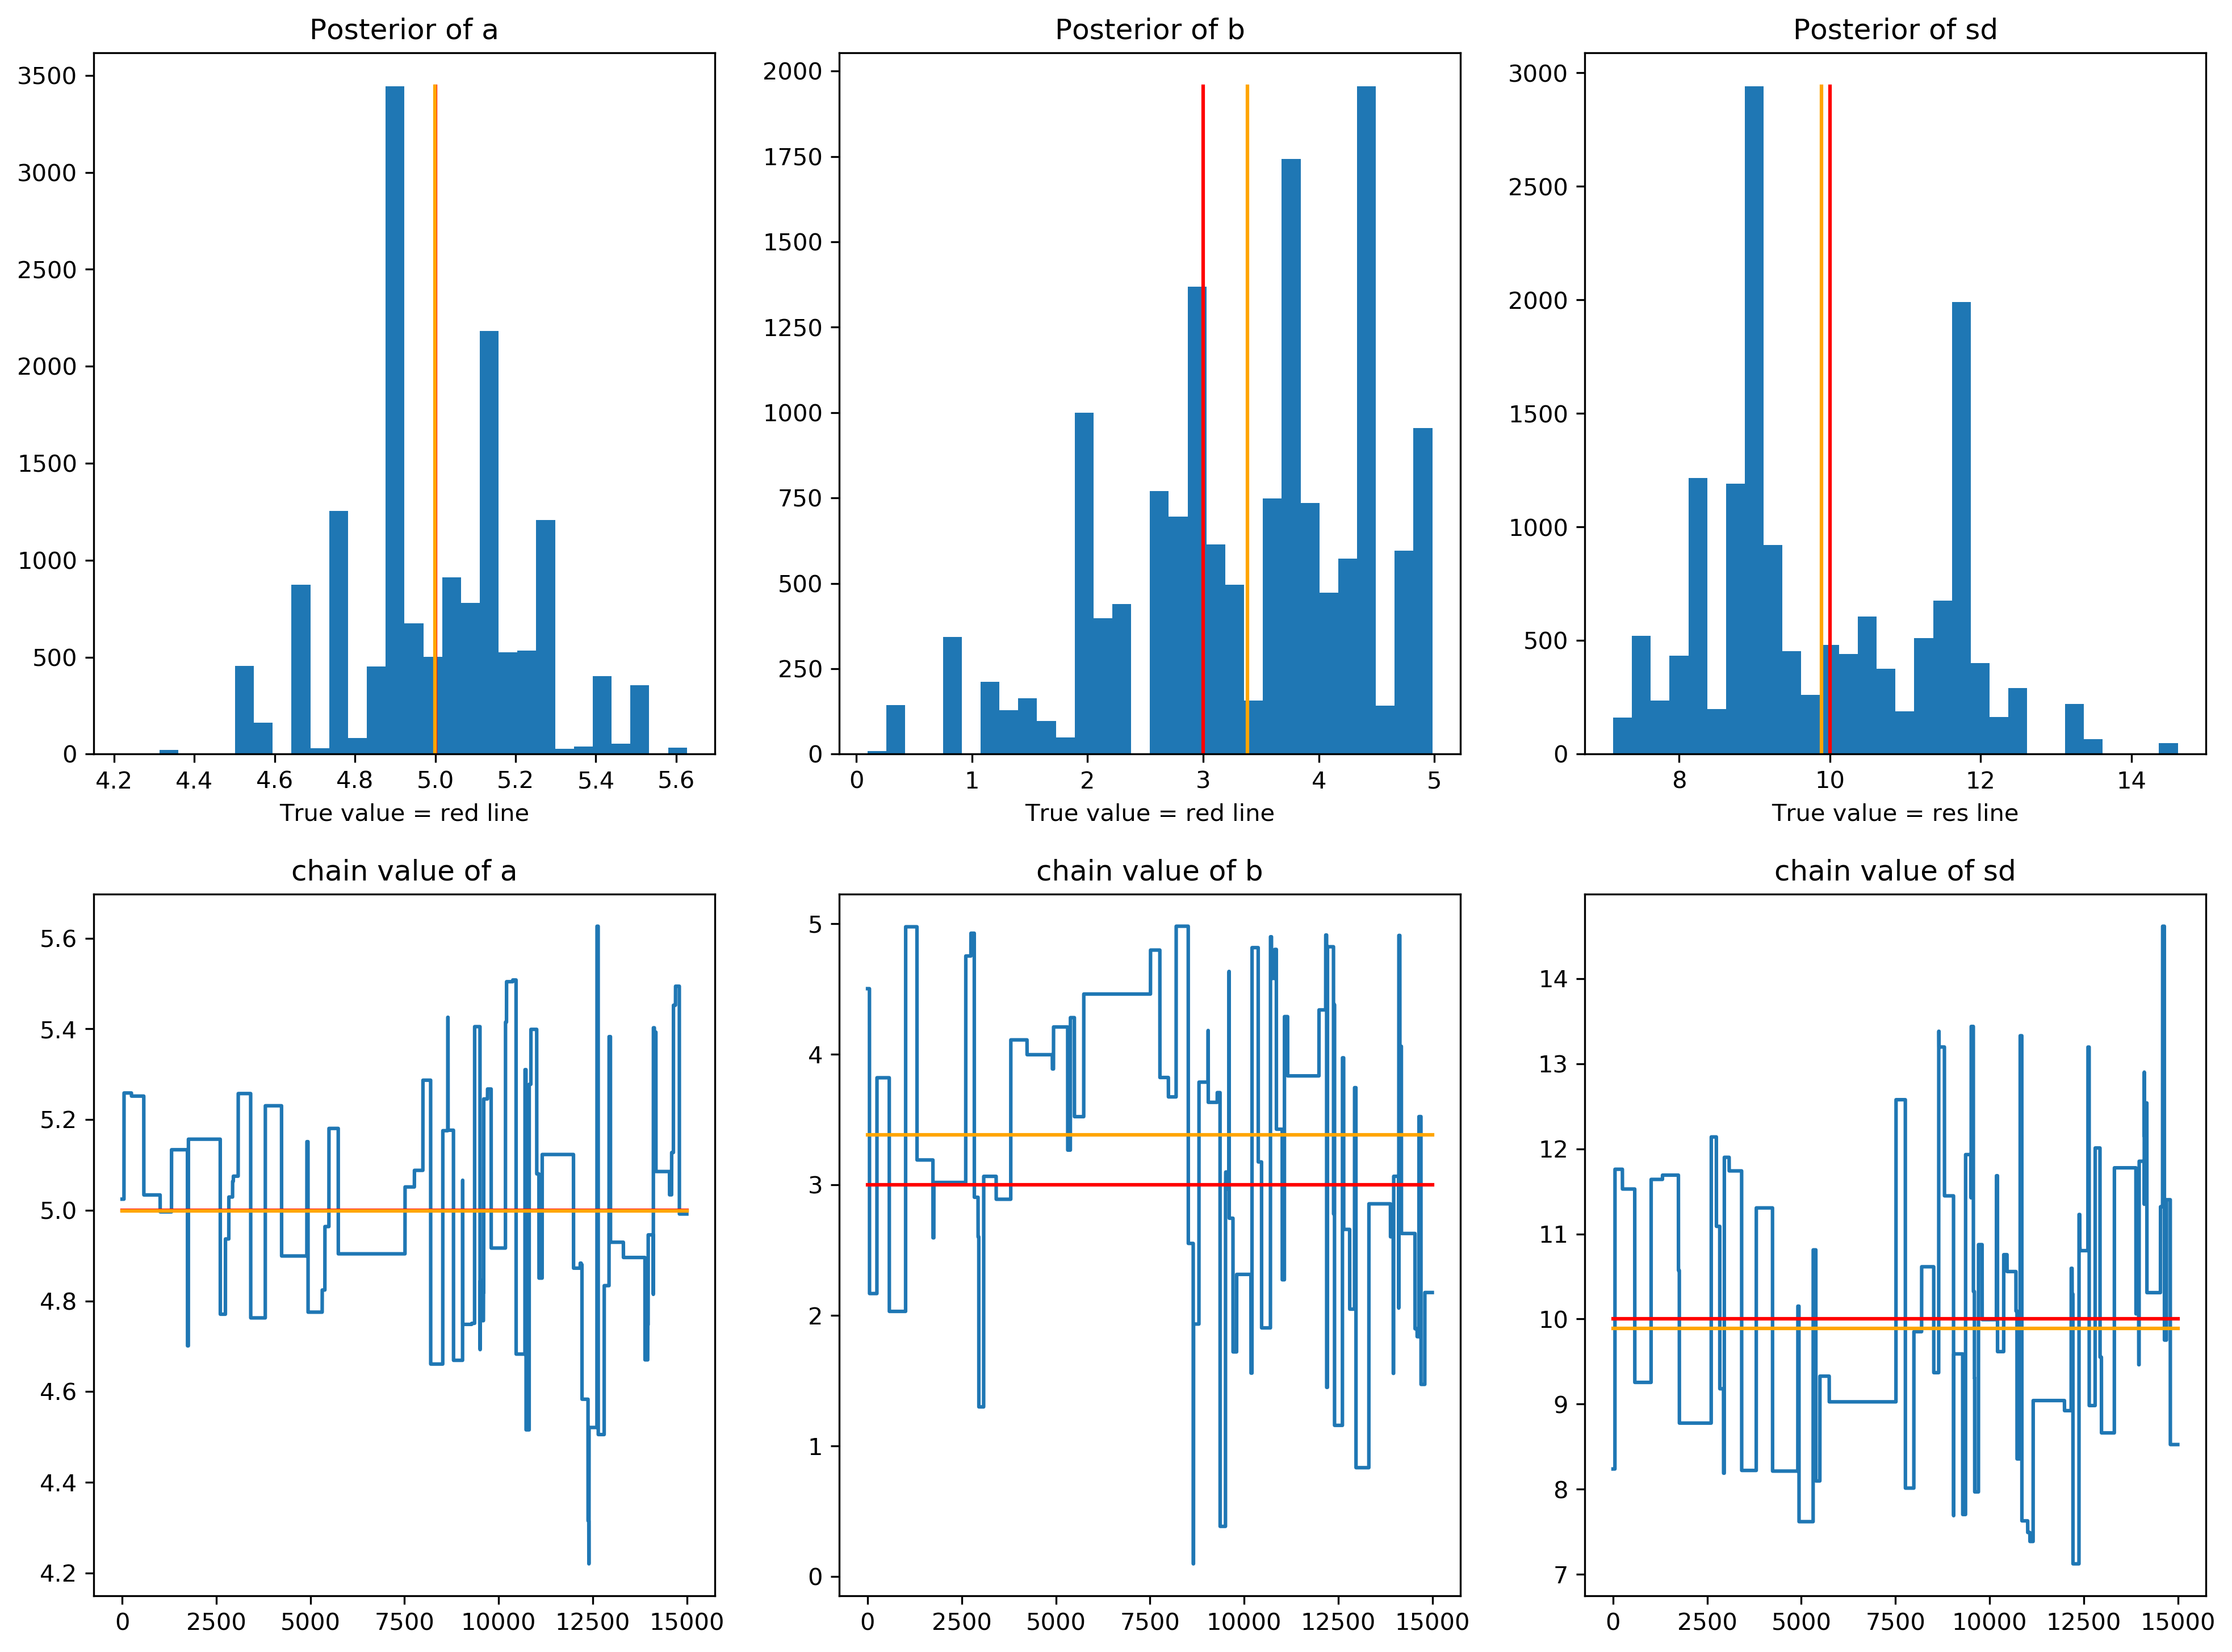

In [25]:
plt.figure(figsize=(16, 12), dpi=300)
plt.subplot(2,3,1)

h = plt.hist(chain[burnIn::,0], bins=30);
plt.title("Posterior of a")
plt.xlabel("True value = red line");
plt.plot(np.array([trueA, trueA]), np.array([h[0].max(), 0]), c='red');
a = np.mean(chain[burnIn::, 0])
plt.plot(np.array([a, a]), np.array([h[0].max(), 0]), c='orange');

plt.subplot(2,3,2)

h = plt.hist(chain[burnIn::,1], bins=30);
plt.title("Posterior of b")
plt.xlabel("True value = red line");
plt.plot(np.array([trueB, trueB]), np.array([h[0].max(), 0]), c='red');
b = np.mean(chain[burnIn::, 1])
plt.plot(np.array([b, b]), np.array([h[0].max(), 0]), c='orange');

plt.subplot(2,3,3)

h = plt.hist(chain[burnIn::,2], bins=30);
plt.title("Posterior of sd")
plt.xlabel("True value = res line");
plt.plot(np.array([trueSd, trueSd]), np.array([h[0].max(), 0]), c='red');
sd = np.mean(chain[burnIn::, 2])
plt.plot(np.array([sd, sd]), np.array([h[0].max(), 0]), c='orange');


plt.subplot(2,3,4)

plt.title('chain value of a')
plt.plot(chain[burnIn::,0])
plt.plot(np.array([0,chain.shape[0]-burnIn]), np.array([trueA, trueA]), c='red')
plt.plot(np.array([0,chain.shape[0]-burnIn]), np.array([a, a]), c='orange')


plt.subplot(2,3,5)

plt.title('chain value of b')
plt.plot(chain[burnIn::,1])
plt.plot(np.array([0,chain.shape[0]-burnIn]), np.array([trueB, trueB]), c='red')
plt.plot(np.array([0,chain.shape[0]-burnIn]), np.array([b, b]), c='orange')

plt.subplot(2,3,6)

plt.title('chain value of sd')
plt.plot(chain[burnIn::,2])
plt.plot(np.array([0,chain.shape[0]-burnIn]), np.array([trueSd, trueSd]), c='red')
plt.plot(np.array([0,chain.shape[0]-burnIn]), np.array([sd, sd]), c='orange');
print('a = ', a, ' | b = ', b, ' | sd = ', sd)
print('a = ', trueA, ' | b = ', trueB, ' | sd = ', trueSd)

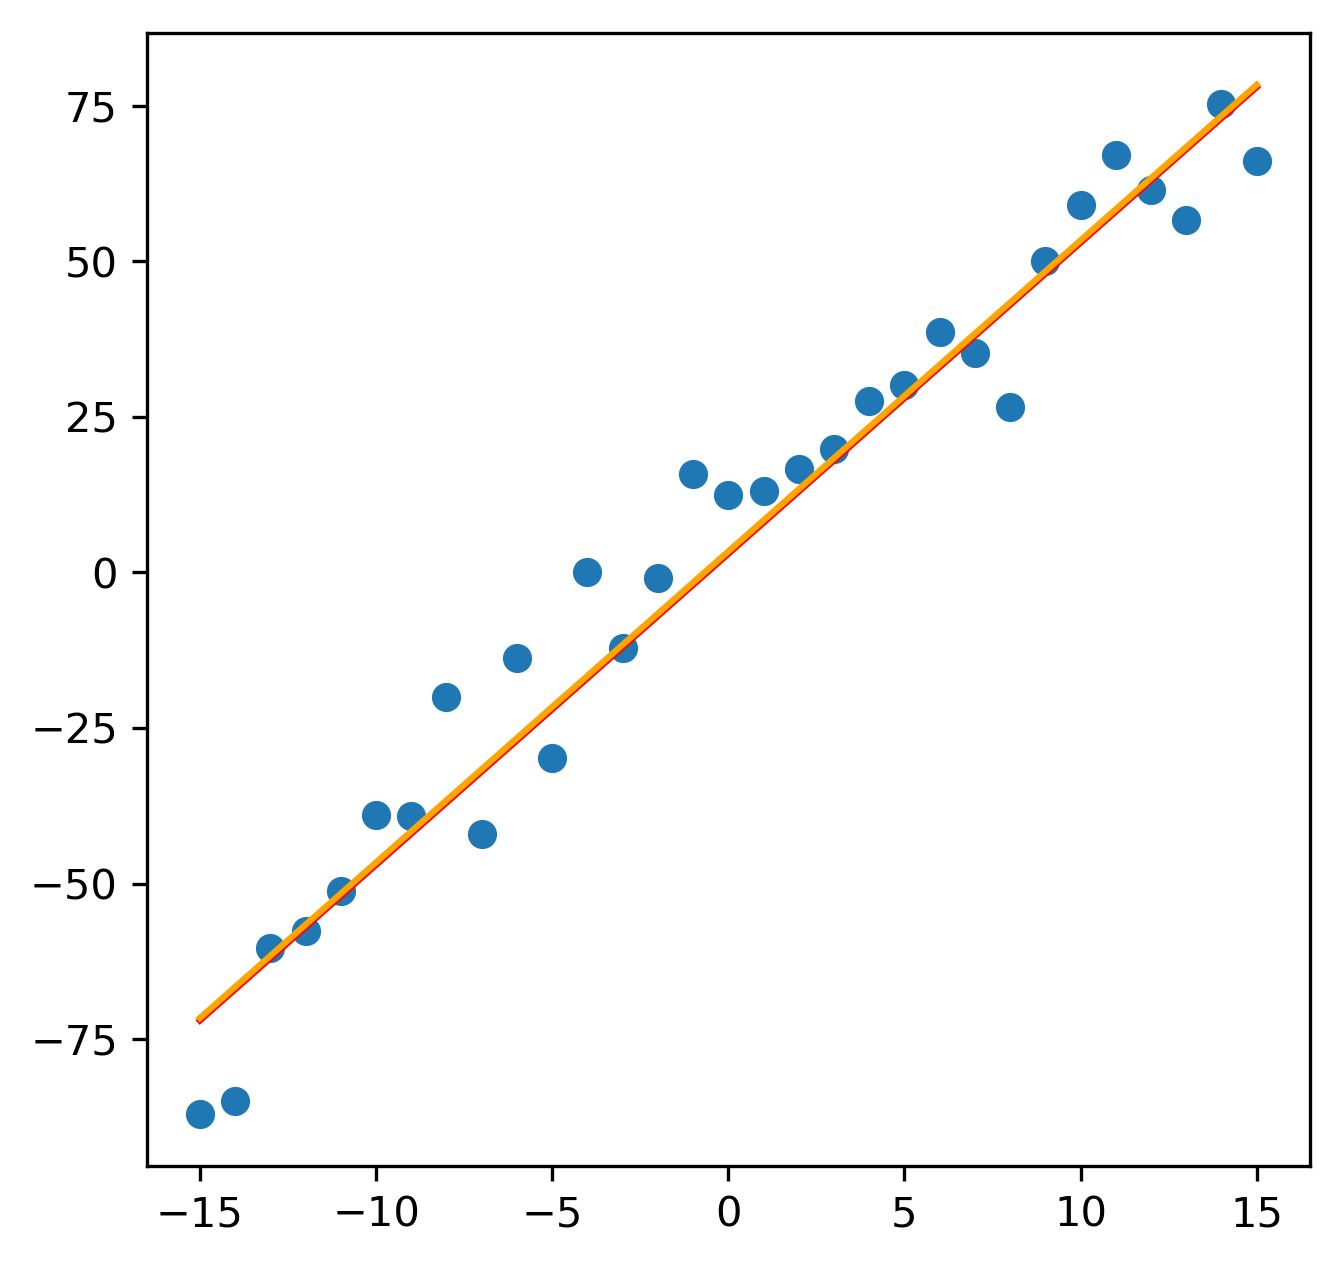

In [26]:
plt.figure(figsize=(5,5), dpi=300)
plt.plot(x,y,'o')

YP = a * x + b 
Y = trueA * x + trueB
plt.plot(x, Y, c='red')
plt.plot(x, YP, c='orange');

[برای مشاهده منبع به این لینک مراجعه نمایید.](https://theoreticalecology.wordpress.com/2010/09/17/metropolis-hastings-mcmc-in-r/)